In [1]:
from sleep_analysis.datasets.d04_main_dataset_control import D04MainStudy
import numpy as np
import pandas as pd
import os
from sklearn import preprocessing
from scipy.signal import find_peaks


In [2]:
from empkins_io.sync import SyncedDataset

import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib widget

In [4]:
from biopsykit.signals.ecg import EcgProcessor

In [5]:
from empkins_micro.emrad.radar import get_rpeaks, get_peak_probabilities

In [6]:
from fau_colors import cmaps, register_fausans_font

In [7]:
%matplotlib widget

In [8]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [9]:
register_fausans_font()
plt.close("all")

palette = sns.color_palette(cmaps.faculties)
sns.set_theme(context="notebook", style="ticks", font="sans-serif", palette=palette)

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["mathtext.default"] = "regular"

palette

[(0.0, 0.1843137254901961, 0.4235294117647059),
 (0.4666666666666667, 0.6235294117647059, 0.7098039215686275),
 (1.0, 0.7215686274509804, 0.10980392156862745),
 (0.0, 0.6392156862745098, 0.8784313725490196),
 (0.2627450980392157, 0.6901960784313725, 0.16470588235294117),
 (0.7843137254901961, 0.06274509803921569, 0.1803921568627451)]

In [10]:
### General Settings
id = 23

# General Radar Settings
fs_radar = 1953.125

In [11]:
dataset = D04MainStudy(exclusion_criteria=["EEG"])

In [12]:
dataset

,subj_id
0,02
1,03
2,04
3,05
4,06
5,07
6,10
7,11
8,12
9,14


In [13]:
dataset[23]

,subj_id
0,31


In [14]:
dataset[23].activity_data.data_as_df(index='local_datetime')

Extracting EDF parameters from /Users/danielkrauss/code/Empkins/Data/empkins_contactless_sleep_lab/Vp_31/psg/Vp_31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


,Activity
date (Europe/Berlin),
2023-12-01 23:23:27+01:00,0.000000
2023-12-01 23:23:27.003906304+01:00,0.000000
2023-12-01 23:23:27.007812608+01:00,0.000000
2023-12-01 23:23:27.011718656+01:00,0.000000
2023-12-01 23:23:27.015624960+01:00,0.000000
...,...
2023-12-02 08:38:36.980468736+01:00,0.011027
2023-12-02 08:38:36.984375040+01:00,0.007728
2023-12-02 08:38:36.988281344+01:00,0.003491


In [15]:
radar_data = dataset[id].radar_data.data_as_df(index='local_datetime', add_sync_out=True)
synced_radar = dataset[id].sync_radar(radar_data)

Prepare SyncedDataset
Sync beginning of m-sequence


/Users/danielkrauss/code/Empkins/empkins-io/empkins_io/sync/_sync.py:325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_secondary.loc[:, sync_channel_secondary] = self._binarize_signal(


13


/Users/danielkrauss/code/Empkins/empkins-io/empkins_io/sync/_sync.py:325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_secondary.loc[:, sync_channel_secondary] = self._binarize_signal(


-13


/Users/danielkrauss/code/Empkins/empkins-io/empkins_io/sync/_sync.py:325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_secondary.loc[:, sync_channel_secondary] = self._binarize_signal(


-16
Find shift at the end of the m-sequence
Shift: rad2_aligned_ 690
Shift: rad3_aligned_ 290
Shift: rad4_aligned_ 70
Resample sample-wise to get equal length
88209763
88210453
88210053
88209833


In [16]:
synced_radar_2 = synced_radar["rad2_aligned_resampled_"][["I", "Q"]]

In [17]:
synced_radar_2 = synced_radar_2#.iloc[10000000:20000000]
synced_radar_2

channel,I,Q
date (Europe/Berlin),,
2023-12-01 22:21:05.006656+01:00,4.135083e+06,785531.000000
2023-12-01 22:21:05.007168+01:00,4.135229e+06,785208.335113
2023-12-01 22:21:05.007680+01:00,4.135060e+06,785245.574907
2023-12-01 22:21:05.008192+01:00,4.134954e+06,785432.459833
2023-12-01 22:21:05.008704+01:00,4.134886e+06,785292.524984
...,...,...
2023-12-02 10:53:48.402752+01:00,4.353538e+06,648025.502650
2023-12-02 10:53:48.403264+01:00,4.354152e+06,648248.655895
2023-12-02 10:53:48.403776+01:00,4.354128e+06,648472.359385


In [18]:
# Determine best lowpass cutoff

In [19]:
radar_values = synced_radar_2["I"].values

In [20]:
nyquist = 0.5 * fs_radar
lowpass_cutoff = 0.3 / nyquist

#high_cutoff = 0.5 / nyquist
#b, a = signal.butter(2, [low_cutoff, high_cutoff], btype='band')
#filtered_phase = signal.filtfilt(b, a, I_values)

# Step 4: Apply a low-pass filter to smooth the signal
b_lp, a_lp = signal.butter(2, lowpass_cutoff, btype='low')
smoothed_phase = signal.filtfilt(b_lp, a_lp, radar_values) 

# Step 6: Envelope detection
envelope = np.abs(signal.hilbert(smoothed_phase))
peaks, _ = find_peaks(envelope, distance = 2.4 * fs_radar)

envelope_03 = pd.DataFrame(envelope, index=synced_radar_2.index)


In [21]:
envelope_03['Peaks'] = 0
envelope_03.iloc[peaks, envelope_03.columns.get_loc('Peaks')] = 1

In [22]:

envelope_03['Peaks'] = np.nan  # Initialize with NaN
envelope_03.loc[envelope_03.index[peaks], 'Peaks'] = envelope[peaks]  # Assign peak values

# Step 3: Calculate breathing rate (in breaths per minute)
peak_times = envelope_03.index[peaks]  # Get the timestamps of the peaks
time_diffs = peak_times.to_series().diff().dt.total_seconds().dropna()  # Calculate time differences in seconds
breathing_rate = 60 / time_diffs  # Convert to breaths per minute (bpm)
breathing_rate.name = "Breathing Rate 03"

# Align the breathing rate with the DataFrame index
breathing_rate_df = pd.DataFrame(breathing_rate, columns=['Breathing Rate 03'])
envelope_03 = envelope_03.join(breathing_rate_df)
envelope_03['Breathing Rate 03'] = envelope_03['Breathing Rate 03'].interpolate(method='linear')
breathing_rate_03 = envelope_03["Breathing Rate 03"].groupby(pd.Grouper(freq='1min', origin='epoch')).mean()

In [23]:
nyquist = 0.5 * fs_radar
lowpass_cutoff = 0.4 / nyquist

#high_cutoff = 0.5 / nyquist
#b, a = signal.butter(2, [low_cutoff, high_cutoff], btype='band')
#filtered_phase = signal.filtfilt(b, a, I_values)

# Step 4: Apply a low-pass filter to smooth the signal
b_lp, a_lp = signal.butter(2, lowpass_cutoff, btype='low')
smoothed_phase = signal.filtfilt(b_lp, a_lp, radar_values) 

# Step 6: Envelope detection
envelope = np.abs(signal.hilbert(smoothed_phase))
peaks, _ = find_peaks(envelope, distance = 2.4 * fs_radar)

envelope_04 = pd.DataFrame(envelope, index=synced_radar_2.index)

envelope_04['Peaks'] = np.nan  # Initialize with NaN
envelope_04.loc[envelope_04.index[peaks], 'Peaks'] = envelope[peaks]  # Assign peak values

# Step 3: Calculate breathing rate (in breaths per minute)
peak_times = envelope_04.index[peaks]  # Get the timestamps of the peaks
time_diffs = peak_times.to_series().diff().dt.total_seconds().dropna()  # Calculate time differences in seconds
breathing_rate = 60 / time_diffs  # Convert to breaths per minute (bpm)
breathing_rate.name = "Breathing Rate 04"

# Align the breathing rate with the DataFrame index
breathing_rate_df = pd.DataFrame(breathing_rate, columns=['Breathing Rate 04'])
envelope_04 = envelope_04.join(breathing_rate_df)
envelope_04['Breathing Rate 04'] = envelope_04['Breathing Rate 04'].interpolate(method='linear')
breathing_rate_04 = envelope_04["Breathing Rate 04"].groupby(pd.Grouper(freq='1min', origin='epoch')).mean()

In [24]:
nyquist = 0.5 * fs_radar
lowpass_cutoff = 0.5 / nyquist

#high_cutoff = 0.5 / nyquist
#b, a = signal.butter(2, [low_cutoff, high_cutoff], btype='band')
#filtered_phase = signal.filtfilt(b, a, I_values)

# Step 4: Apply a low-pass filter to smooth the signal
b_lp, a_lp = signal.butter(2, lowpass_cutoff, btype='low')
smoothed_phase = signal.filtfilt(b_lp, a_lp, radar_values) 

# Step 6: Envelope detection
envelope = np.abs(signal.hilbert(smoothed_phase))
peaks, _ = find_peaks(envelope, distance = 2.4 * fs_radar)

envelope_05 = pd.DataFrame(envelope, index=synced_radar_2.index)

envelope_05['Peaks'] = np.nan  # Initialize with NaN
envelope_05.loc[envelope_05.index[peaks], 'Peaks'] = envelope[peaks]  # Assign peak values

# Step 3: Calculate breathing rate (in breaths per minute)
peak_times = envelope_05.index[peaks]  # Get the timestamps of the peaks
time_diffs = peak_times.to_series().diff().dt.total_seconds().dropna()  # Calculate time differences in seconds
breathing_rate = 60 / time_diffs  # Convert to breaths per minute (bpm)
breathing_rate.name = "Breathing Rate 05"

# Align the breathing rate with the DataFrame index
breathing_rate_df = pd.DataFrame(breathing_rate, columns=['Breathing Rate 05'])
envelope_05 = envelope_05.join(breathing_rate_df)
envelope_05['Breathing Rate 05'] = envelope_05['Breathing Rate 05'].interpolate(method='linear')
breathing_rate_05 = envelope_05["Breathing Rate 05"].groupby(pd.Grouper(freq='1min', origin='epoch')).mean()

In [25]:
nyquist = 0.5 * fs_radar
lowpass_cutoff = 0.6 / nyquist

#high_cutoff = 0.5 / nyquist
#b, a = signal.butter(2, [low_cutoff, high_cutoff], btype='band')
#filtered_phase = signal.filtfilt(b, a, I_values)

# Step 4: Apply a low-pass filter to smooth the signal
b_lp, a_lp = signal.butter(2, lowpass_cutoff, btype='low')
smoothed_phase = signal.filtfilt(b_lp, a_lp, radar_values) 

# Step 6: Envelope detection
envelope = np.abs(signal.hilbert(smoothed_phase))
peaks, _ = find_peaks(envelope, distance = 2.4 * fs_radar)

envelope_06 = pd.DataFrame(envelope, index=synced_radar_2.index)

envelope_06['Peaks'] = np.nan  # Initialize with NaN
envelope_06.loc[envelope_06.index[peaks], 'Peaks'] = envelope[peaks]  # Assign peak values

# Step 3: Calculate breathing rate (in breaths per minute)
peak_times = envelope_06.index[peaks]  # Get the timestamps of the peaks
time_diffs = peak_times.to_series().diff().dt.total_seconds().dropna()  # Calculate time differences in seconds
breathing_rate = 60 / time_diffs  # Convert to breaths per minute (bpm)
breathing_rate.name = "Breathing Rate 06"

# Align the breathing rate with the DataFrame index
breathing_rate_df = pd.DataFrame(breathing_rate, columns=['Breathing Rate 06'])
envelope_06 = envelope_06.join(breathing_rate_df)
envelope_06['Breathing Rate 06'] = envelope_06['Breathing Rate 06'].interpolate(method='linear')
breathing_rate_06 = envelope_06["Breathing Rate 06"].groupby(pd.Grouper(freq='1min', origin='epoch')).mean()

In [26]:
nyquist = 0.5 * fs_radar
lowpass_cutoff = 0.7 / nyquist

#high_cutoff = 0.5 / nyquist
#b, a = signal.butter(2, [low_cutoff, high_cutoff], btype='band')
#filtered_phase = signal.filtfilt(b, a, I_values)

# Step 4: Apply a low-pass filter to smooth the signal
b_lp, a_lp = signal.butter(2, lowpass_cutoff, btype='low')
smoothed_phase = signal.filtfilt(b_lp, a_lp, radar_values) 

# Step 6: Envelope detection
envelope = np.abs(signal.hilbert(smoothed_phase))
peaks, _ = find_peaks(envelope, distance = 2.4 * fs_radar)

envelope_07 = pd.DataFrame(envelope, index=synced_radar_2.index)

envelope_07['Peaks'] = np.nan  # Initialize with NaN
envelope_07.loc[envelope_07.index[peaks], 'Peaks'] = envelope[peaks]  # Assign peak values

# Step 3: Calculate breathing rate (in breaths per minute)
peak_times = envelope_07.index[peaks]  # Get the timestamps of the peaks
time_diffs = peak_times.to_series().diff().dt.total_seconds().dropna()  # Calculate time differences in seconds
breathing_rate = 60 / time_diffs  # Convert to breaths per minute (bpm)
breathing_rate.name = "Breathing Rate 07"

# Align the breathing rate with the DataFrame index
breathing_rate_df = pd.DataFrame(breathing_rate, columns=['Breathing Rate 07'])
envelope_07 = envelope_07.join(breathing_rate_df)
envelope_07['Breathing Rate 07'] = envelope_07['Breathing Rate 07'].interpolate(method='linear')
breathing_rate_07 = envelope_07["Breathing Rate 07"].groupby(pd.Grouper(freq='1min', origin='epoch')).mean()

In [27]:

# Step 7: Peak detection
#peaks, _ = signal.find_peaks(envelope, distance=fs_radar//2)


In [28]:
df_resp = dataset[id].respiration_data.data_as_df(index='local_datetime')

Extracting EDF parameters from /Users/danielkrauss/code/Empkins/Data/empkins_contactless_sleep_lab/Vp_31/psg/Vp_31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [29]:
df_resp = df_resp#.loc["2023-04-18 22:53":"2023-04-19 00:20"]["Summe RIP"]
df_resp = df_resp["Summe RIP"]

In [30]:
# Step 1: Define the sampling frequency and the cutoff frequency for the low-pass filter
fs = 256  # Sampling frequency in Hz, replace with your actual sampling frequency
cutoff = 0.5  # Cutoff frequency in Hz, adjust based on the expected maximum frequency of the breathing signal

# Step 2: Normalize the cutoff frequency with respect to Nyquist frequency
nyquist = 0.5 * fs
normalized_cutoff = cutoff / nyquist

# Step 3: Design a Butterworth low-pass filter
b, a = signal.butter(4, normalized_cutoff, btype='low', analog=False)

# Step 4: Apply the filter to the ground truth breathing signal
filtered_signal = signal.filtfilt(b, a, df_resp.values)


In [31]:
breathing_curve = pd.DataFrame(filtered_signal, index=df_resp.index)
peaks, _ = find_peaks(breathing_curve[0].values, distance = 2.4 * 256)

breathing_curve['Peaks'] = np.nan  # Initialize with NaN
breathing_curve.loc[breathing_curve.index[peaks], 'Peaks'] = breathing_curve[0].values[peaks]  # Assign peak values

# Step 3: Calculate breathing rate (in breaths per minute)
peak_times = breathing_curve.index[peaks]  # Get the timestamps of the peaks
time_diffs = peak_times.to_series().diff().dt.total_seconds().dropna()  # Calculate time differences in seconds
breathing_rate = 60 / time_diffs  # Convert to breaths per minute (bpm)
breathing_rate.name = "Breathing Rate GT"

# Align the breathing rate with the DataFrame index
breathing_rate_df = pd.DataFrame(breathing_rate, columns=['Breathing Rate GT'])
breathing_curve = breathing_curve.join(breathing_rate_df)
breathing_curve['Breathing Rate GT'] = breathing_curve['Breathing Rate GT'].interpolate(method='linear')
breathing_rate_gt = breathing_curve["Breathing Rate GT"].groupby(pd.Grouper(freq='1min', origin='epoch')).mean()

In [32]:
envelope_03.dropna()

,0,Peaks,Breathing Rate 03
date (Europe/Berlin),,,
2023-12-01 22:21:07.407936+01:00,4.147243e+06,4.147243e+06,24.997334
2023-12-01 22:21:12.199232+01:00,4.140628e+06,4.140628e+06,12.522708
2023-12-01 22:21:14.599488+01:00,4.139392e+06,4.139392e+06,24.997334
2023-12-01 22:21:20.450624+01:00,4.138060e+06,4.138060e+06,10.254419
2023-12-01 22:21:23.386432+01:00,4.137600e+06,4.137600e+06,20.437304
...,...,...,...
2023-12-02 10:53:38.327616+01:00,4.360350e+06,4.360350e+06,24.997334
2023-12-02 10:53:40.727872+01:00,4.361021e+06,4.361021e+06,24.997334
2023-12-02 10:53:43.128128+01:00,4.362399e+06,4.362399e+06,24.997334


In [33]:
start = "2023-12-02 02:40"
stop = "2023-12-02 03:20"
envelope_03 = envelope_03.loc[start:stop]
envelope_04 = envelope_04.loc[start:stop]
envelope_05 = envelope_05.loc[start:stop]
envelope_06 = envelope_06.loc[start:stop]
envelope_07 = envelope_07.loc[start:stop]

In [34]:
#
## Plotting the result
#fig, ax = plt.subplots(6, sharex=True, figsize=(10, 10))
#ax[0].plot(envelope_03[0], label='Envelope')
#ax[0].plot(envelope_03.index, envelope_03['Peaks'], 'ro', label='Peaks')  # Mark peaks with red dots
#
#ax[1].plot(envelope_04[0], label='Envelope')
#ax[1].plot(envelope_04.index, envelope_04['Peaks'], 'ro', label='Peaks')  # Mark peaks with red dots
#
#ax[2].plot(envelope_05[0], label='Envelope')
#ax[2].plot(envelope_05.index, envelope_05['Peaks'], 'ro', label='Peaks')  # Mark peaks with red dots
#
#ax[3].plot(envelope_06[0], label='Envelope')
#ax[3].plot(envelope_06.index, envelope_06['Peaks'], 'ro', label='Peaks')  # Mark peaks with red dots
#
#ax[4].plot(envelope_07[0], label='Envelope')
#ax[4].plot(envelope_07.index, envelope_07['Peaks'], 'ro', label='Peaks')  # Mark peaks with red dots
#
##ax[5].plot(breathing_curve)
#plt.show()

In [35]:
#fig, ax = plt.subplots(6, sharex=True, figsize=(10, 10))
#ax[0].plot(breathing_rate_03)
#ax[1].plot(breathing_rate_04)
#ax[2].plot(breathing_rate_05)
#ax[3].plot(breathing_rate_06)
#ax[4].plot(breathing_rate_07)
#ax[5].plot(breathing_rate_gt)
#plt.show()

In [36]:
df_breathing_rates = pd.concat([breathing_rate_03, breathing_rate_04, breathing_rate_05, breathing_rate_06, breathing_rate_07, breathing_rate_gt], axis=1)
df_breathing_rates

,Breathing Rate 03,Breathing Rate 04,Breathing Rate 05,Breathing Rate 06,Breathing Rate 07,Breathing Rate GT
date (Europe/Berlin),,,,,,
2023-12-01 22:21:00+01:00,17.313071,19.830726,18.599278,19.324891,18.382086,NaN
2023-12-01 22:22:00+01:00,17.180601,17.538133,18.573231,17.525618,18.602388,NaN
2023-12-01 22:23:00+01:00,14.521603,16.454018,17.410366,17.392689,16.496123,NaN
2023-12-01 22:24:00+01:00,14.894166,17.713216,17.724135,17.746591,17.675380,NaN
2023-12-01 22:25:00+01:00,14.450004,16.332717,16.234777,15.153342,16.267584,NaN
...,...,...,...,...,...,...
2023-12-02 10:49:00+01:00,5.793472,8.920386,6.647392,13.979865,15.603124,NaN
2023-12-02 10:50:00+01:00,1.347843,4.368070,9.499242,13.969644,15.687262,NaN
2023-12-02 10:51:00+01:00,9.092428,11.602747,14.653952,15.392276,14.580321,NaN


In [37]:
mae = df_breathing_rates.drop(columns=['Breathing Rate GT']).apply(lambda x: np.mean(np.abs(x - df_breathing_rates['Breathing Rate GT'])), axis=0)
mae

Breathing Rate 03    0.382070
Breathing Rate 04    0.326785
Breathing Rate 05    0.351614
Breathing Rate 06    0.454560
Breathing Rate 07    0.544078
dtype: float64

In [38]:
nyquist = 0.5 * fs_radar
lowpass_cutoff = 0.5 / nyquist

In [39]:
radar_values = synced_radar["rad1_aligned_resampled_"]["Q"].values

# Step 4: Apply a low-pass filter to smooth the signal
b_lp, a_lp = signal.butter(2, lowpass_cutoff, btype='low')
smoothed_phase = signal.filtfilt(b_lp, a_lp, radar_values) 

# Step 6: Envelope detection
envelope = np.abs(signal.hilbert(smoothed_phase))
peaks, _ = find_peaks(envelope, distance = 2.4 * fs_radar)

envelope_01 = pd.DataFrame(envelope, index=synced_radar.index)

envelope_01['Peaks'] = np.nan  # Initialize with NaN
envelope_01.loc[envelope_01.index[peaks], 'Peaks'] = envelope[peaks]  # Assign peak values


In [40]:
radar_values = synced_radar["rad2_aligned_resampled_"]["Q"].values

# Step 4: Apply a low-pass filter to smooth the signal
b_lp, a_lp = signal.butter(2, lowpass_cutoff, btype='low')
smoothed_phase = signal.filtfilt(b_lp, a_lp, radar_values) 

# Step 6: Envelope detection
envelope = np.abs(signal.hilbert(smoothed_phase))
peaks, _ = find_peaks(envelope, distance = 2.4 * fs_radar)

envelope_02 = pd.DataFrame(envelope, index=synced_radar.index)

envelope_02['Peaks'] = np.nan  # Initialize with NaN
envelope_02.loc[envelope_02.index[peaks], 'Peaks'] = envelope[peaks]  # Assign peak values


In [41]:
radar_values = synced_radar["rad3_aligned_resampled_"]["Q"].values

# Step 4: Apply a low-pass filter to smooth the signal
b_lp, a_lp = signal.butter(2, lowpass_cutoff, btype='low')
smoothed_phase = signal.filtfilt(b_lp, a_lp, radar_values) 

# Step 6: Envelope detection
envelope = np.abs(signal.hilbert(smoothed_phase))
peaks, _ = find_peaks(envelope, distance = 2.4 * fs_radar)

envelope_03 = pd.DataFrame(envelope, index=synced_radar.index)

envelope_03['Peaks'] = np.nan  # Initialize with NaN
envelope_03.loc[envelope_03.index[peaks], 'Peaks'] = envelope[peaks]  # Assign peak values


In [42]:
radar_values = synced_radar["rad4_aligned_resampled_"]["Q"].values

# Step 4: Apply a low-pass filter to smooth the signal
b_lp, a_lp = signal.butter(2, lowpass_cutoff, btype='low')
smoothed_phase = signal.filtfilt(b_lp, a_lp, radar_values) 

# Step 6: Envelope detection
envelope = np.abs(signal.hilbert(smoothed_phase))
peaks, _ = find_peaks(envelope, distance = 2.4 * fs_radar)

envelope_04 = pd.DataFrame(envelope, index=synced_radar.index)

envelope_04['Peaks'] = np.nan  # Initialize with NaN
envelope_04.loc[envelope_04.index[peaks], 'Peaks'] = envelope[peaks]  # Assign peak values


In [43]:
start = "2023-12-02 01:00"
stop = "2023-12-02 01:00:16"
envelope_01 = envelope_01.loc[start:stop]
envelope_02 = envelope_02.loc[start:stop]
envelope_03 = envelope_03.loc[start:stop]
envelope_04 = envelope_04.loc[start:stop]

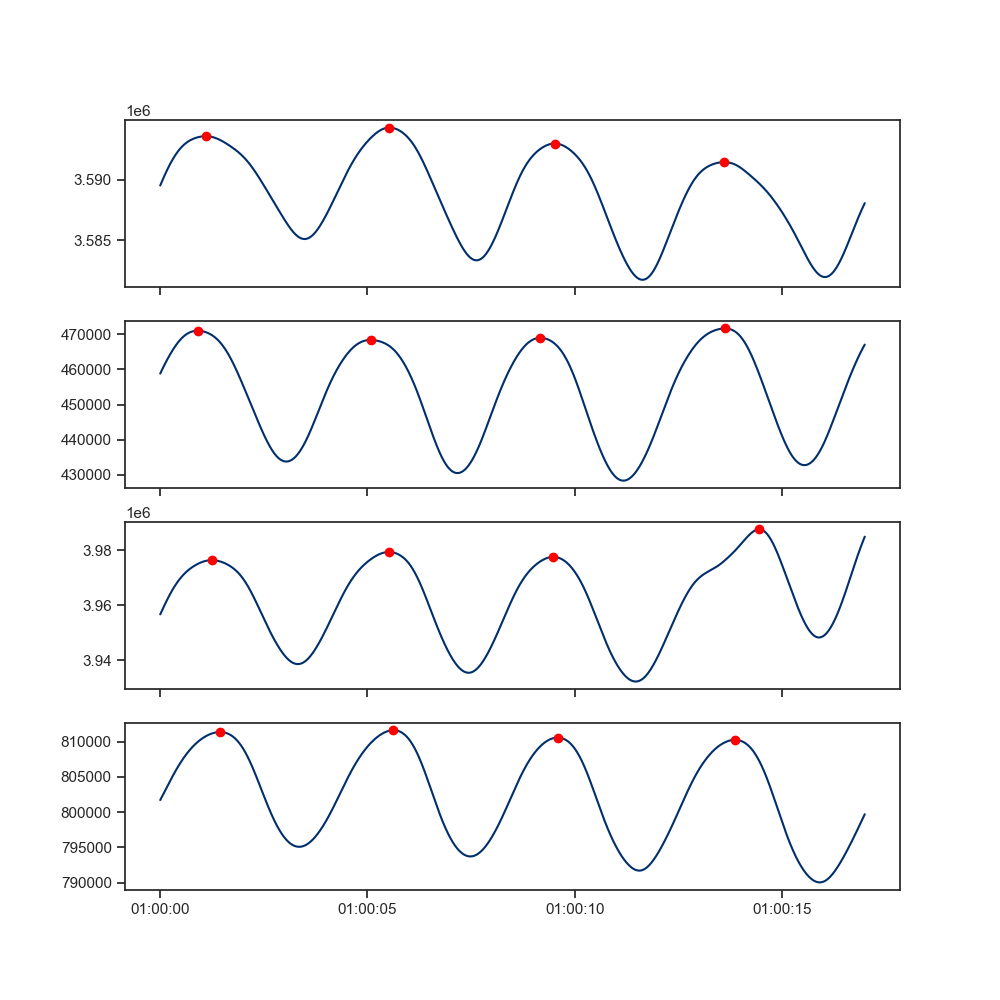

In [44]:
# Plotting the result
fig, ax = plt.subplots(4, sharex=True, figsize=(10, 10))
ax[0].plot(envelope_01[0], label='Envelope')
ax[0].plot(envelope_01.index, envelope_01['Peaks'], 'ro', label='Peaks')  # Mark peaks with red dots

ax[1].plot(envelope_02[0], label='Envelope')
ax[1].plot(envelope_02.index, envelope_02['Peaks'], 'ro', label='Peaks')  # Mark peaks with red dots

ax[2].plot(envelope_03[0], label='Envelope')
ax[2].plot(envelope_03.index, envelope_03['Peaks'], 'ro', label='Peaks')  # Mark peaks with red dots

ax[3].plot(envelope_04[0], label='Envelope')
ax[3].plot(envelope_04.index, envelope_04['Peaks'], 'ro', label='Peaks')  # Mark peaks with red dots


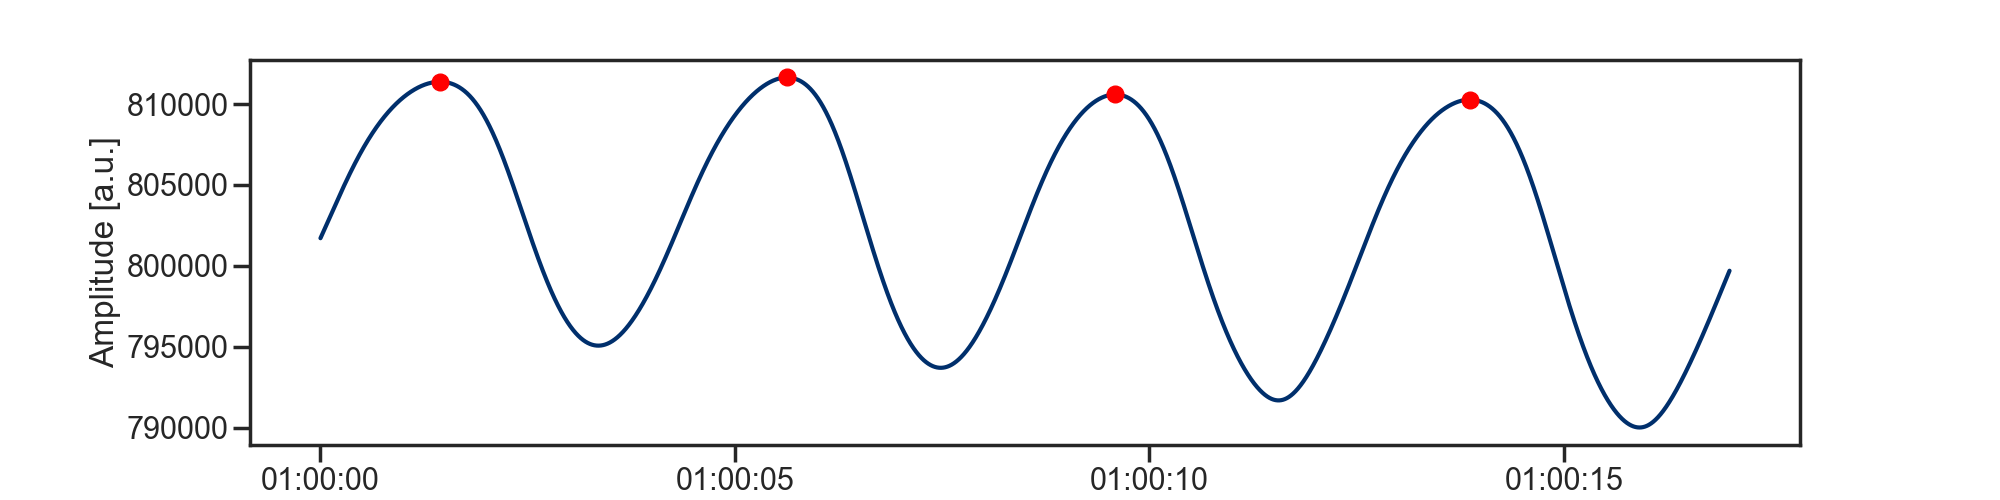

In [45]:
sns.set_theme(context="poster", style="ticks", font="sans-serif", palette=palette)

fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(envelope_04[0], label='Envelope')
ax.plot(envelope_04.index, envelope_04['Peaks'], 'ro', label='Peaks')  # Mark peaks with red dots
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude [a.u.]")

plt.savefig("extracted_resp.pdf", bbox_inches="tight")